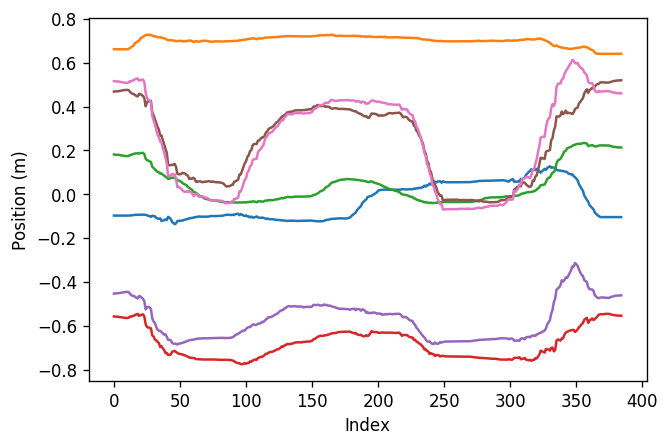

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from transforms3d.quaternions import qmult
fig=plt.figure(dpi= 120, facecolor='w', edgecolor='k')
#### read in the txt file
import numpy as np
pos_list = np.loadtxt('../data/short_fork_careful_carry.txt', delimiter=',')
result_array = np.zeros((0,8))

for curRow in pos_list:
    # t, x, y, z, { x, y, z, w }
    curQuat = (curRow[7],
                curRow[4],
                curRow[5],
                curRow[6])
    pos = np.array([[0, -1, 0],[1,0,0],[0,0,1]]).dot(curRow[1:4])
    # I wish I could say this was done in a more clever way than trial and error
    # quats on the left are applied first
    # the point of this is to convert 1) the fact that the UR5 in oliver's lab has X pointing left (not toward me)
    # the 
    newQuat = qmult(qmult(qmult([0.707, 0, 0, 0.707], curQuat),[-0.5, 0.5, 0.5, 0.5]),[-0.707, 0.707, 0.0, 0.0])
    newRow = np.concatenate(([curRow[0]], pos + [0, 0.4, 0], newQuat[1:4], [newQuat[0]]))
    result_array = np.append(result_array, [newRow], axis=0)

plt.plot(result_array[:,1:])
plt.xlabel("Index")
plt.ylabel("Position (m)")
raw_data.shape

np.savetxt('../data/ur5_translated_pose_data.txt', result_array, fmt="%0.10f", delimiter=', ')